In [ ]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# dir
os.chdir('/content/drive/MyDrive/AAFT_Draft/Data/')

In [ ]:
profiles = pd.read_csv('web1/profilesCleaned.csv')

In [ ]:
posts = pd.read_csv('web1/postsCleaned.csv')

In [80]:
def cloudy(text_series, title, exclusions = []):

    filtered = text_series.dropna().astype(str).apply(lambda x: re.sub(r'\*\w*婚|\*\w*婚对象', '', x)).apply(lambda x: ' '.join([sentence for sentence in x.split() if sentence not in exclusions]))
    text = ' '.join(filtered.values)

    wordcloud = WordCloud(font_path='SimHei.ttf', width=1600, height=800,
                          background_color='white', colormap = 'cividis').generate(text)

    # plot
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

In [ ]:
# exclude default
exclude = ['TA还没有填写BF/GF期望，你可以私信给TA进一步了解~',
           'TA还没有填写形婚期望，你可以私信给TA进一步了解~',
           '*婚', '无']

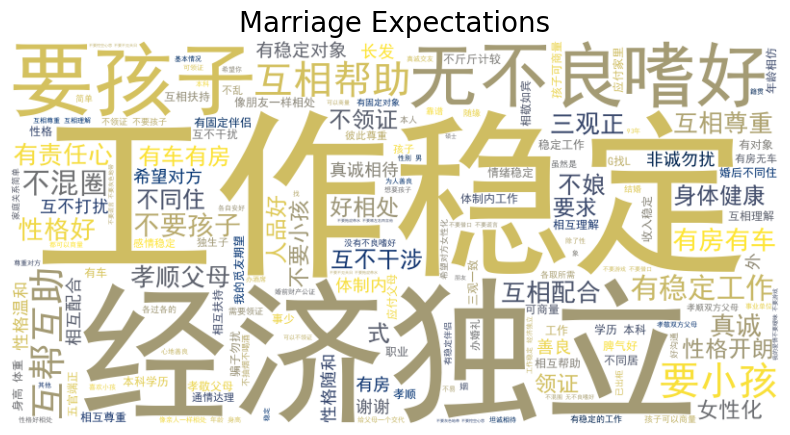

In [ ]:
# word cloud for marExp
cloudy(profiles['marExp'], 'Marriage Expectations', exclusions = exclude)

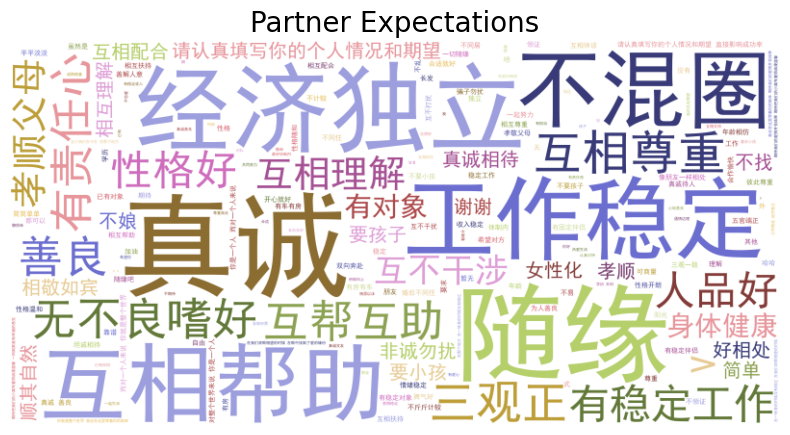

In [ ]:
# word cloud for parExp
cloudy(profiles['parExp'], 'Partner Expectations', exclusions = exclude)

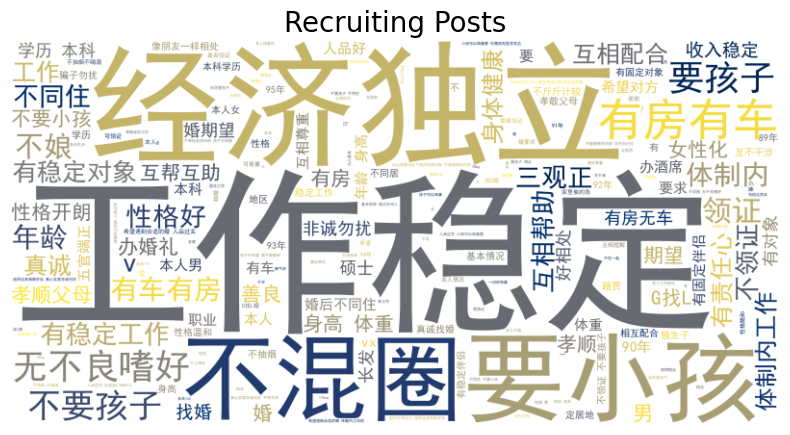

In [ ]:
# word cloud for posts
cloudy(posts['description'], 'Recruiting Posts', exclusions = exclude)

In [74]:
cgl = pd.read_csv('survey/cgl_total.csv')

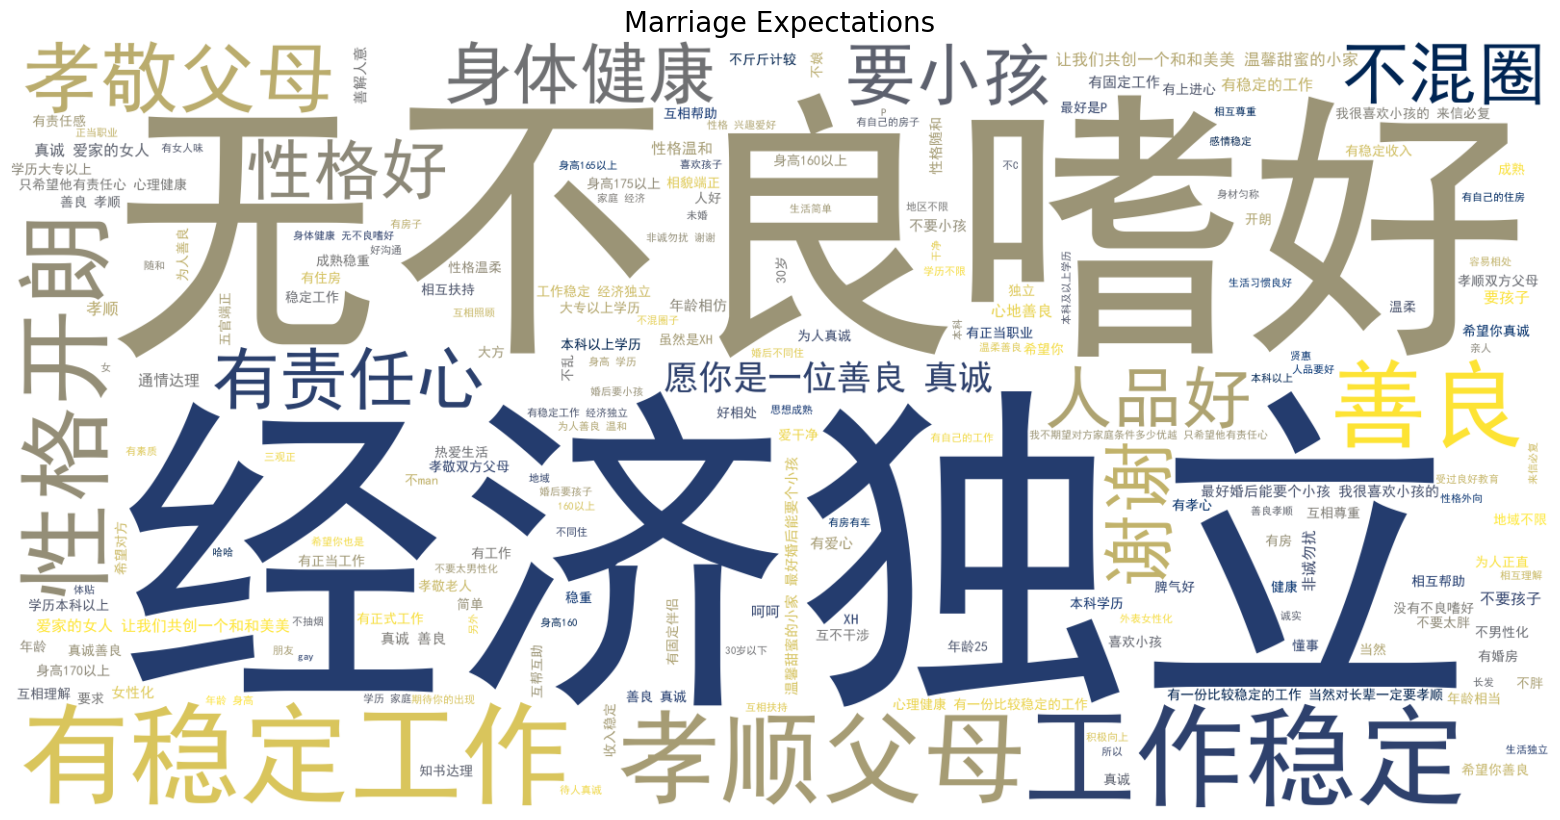

In [81]:
cloudy(cgl['exp'], 'Marriage Expectations', exclusions = exclude)